In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
import matplotlib.pyplot as plt
import sys
%load_ext autoreload
%autoreload 2


In [2]:
sys.path.append('../..')
import problems, projection, optimize

# testing problems
---
> - additional `Problems` parameters:
>> - `ESI`:      generates equivalent symmetric indefinite system; [QtQ Ct; C 0] [x; y] = [Qtb g] (for testing MINRES)
>> - `ESIN`:     generates ESI^T ESI symmetric positive semidefinite system (for testing CG)
>> - `ESIE`:     generates ESI expanded into Sean's second formulation (for testing MINRES without forming QtQ)
>> - `dir_soln`: generates direct solution for $w$ of the sort `la.solve` for $MRK_b R^T M^T w = MR s_b$
> - structure:
>> - 1D blur problems
>> - 2D blur problems

__1D blur__
> - pixels = 200
> - ROI(k) = 10, 100 , 190 with 3 steps
> - $\lambda$ = 0.01, $\kappa$ $\times$ 0.01, $\kappa$, $\kappa$ $\times$ 10
> - B = identity

---

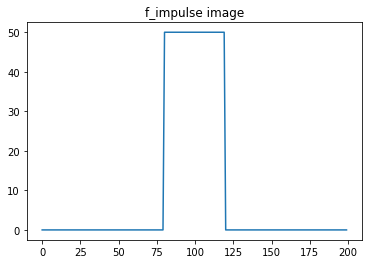

=================== setup ====================
(n_1, n_2, m) = (200, None, 200)
problem       = 1D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = 100

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (200, 200)
X shape       = (200, 200)
M shape       = (50, 200)
B shape       = (200, 200)
sx shape      = (200, 1)
sb shape      = (200, 1)
============= system dimensions ===============
ESI_A shape   = (400, 400)
ESI_b shape   = (400,)
ESIN_A shape  = (400, 400)
ESIN_b shape  = (400,)


/Users/jakeroth/anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [3]:
# single test
## problem
n_1 = 200
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, ESIN=True, ESI3=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.435
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.546
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.556
===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 2
     beta: 0.05
===== method = all ======================================================================



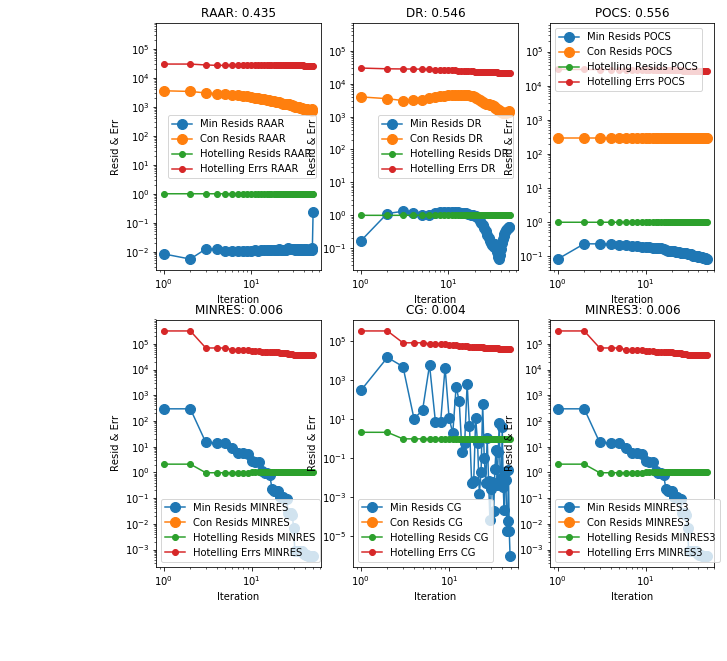

In [4]:
## examples: solve problem - - - - - - - - - - - - - - - - -
# projection.test_proj_alg(prob=p, method='pocs')
# projection.test_proj_alg(prob=p, method='dr', sl=1.25)
# projection.test_proj_alg(prob=p, method='raar')
# projection.test_proj_alg(prob=p, method='minres')
# projection.test_proj_alg(prob=p, method='cg')
m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.05)

In [5]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 200
kk     = np.linspace(10, 190, 3)

# find condition number of XtX
tp = problems.Problem(prob='b', n_1=n_1, k=k, ESI=False, ESIN=False, ESI3=False, dir_soln=True)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

# set regularization
lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

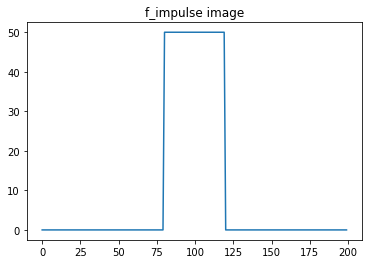

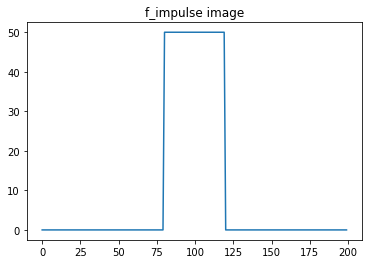

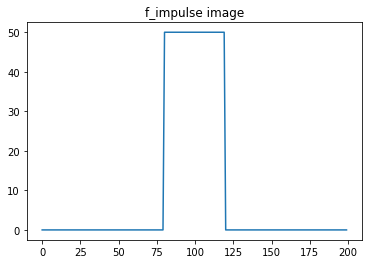

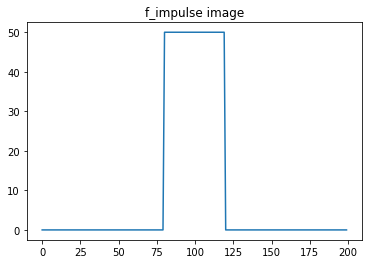

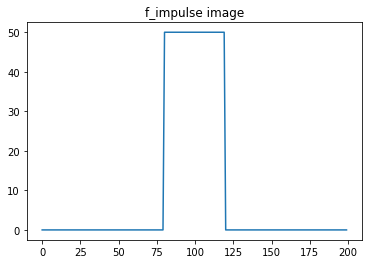

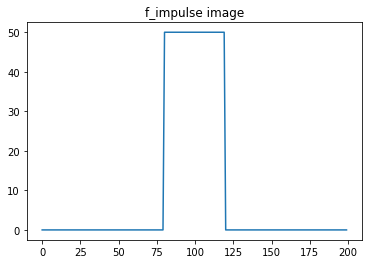

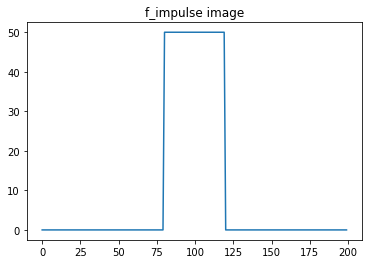

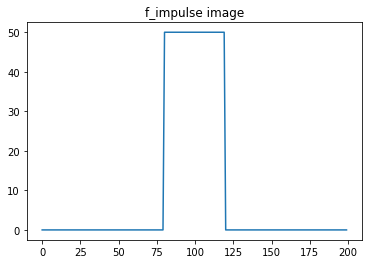

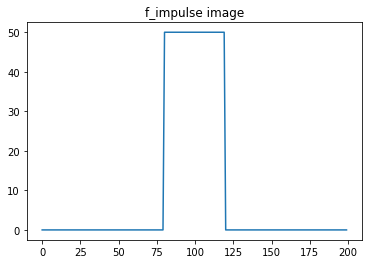

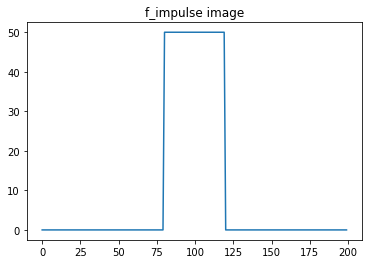

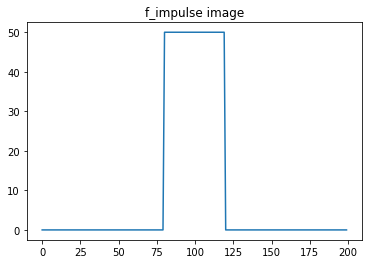

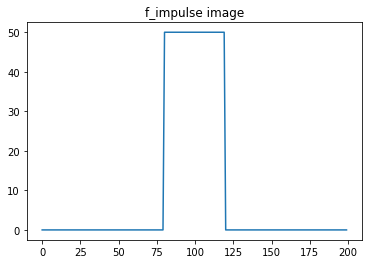

In [6]:
# create problems
ps = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps.append(p)

In [ ]:
# # solve problems individually
# for p in ps:
#     projection.test_proj_alg(prob=p, method='pocs')
#     projection.test_proj_alg(prob=p, method='dr', sl_dr=1.5)
#     projection.test_proj_alg(prob=p, method='raar', beta=0.5)
#     projection.test_proj_alg(prob=p, method='minres')


----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.337
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.381
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.343
===== method = all ======================================================================
          lam: 1.00E-02
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



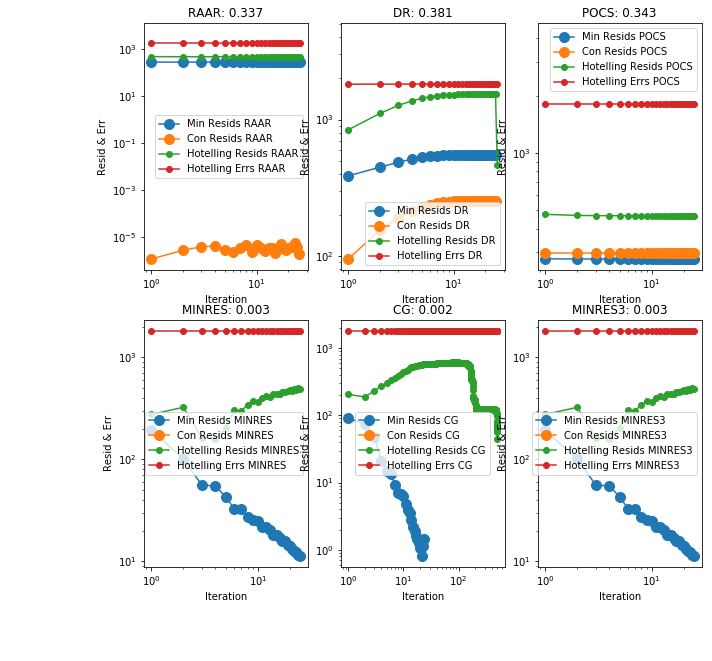

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[494.52624560858027, 494.52624560858027, 494.52624560858027, 494.52624560858027]
[1811.069106952217, 1811.069106952217, 1811.069106952217, 1811.069106952217]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.365
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.323
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.306
===== method = all ======================================================================
          lam: 1.95E+09
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===============================================

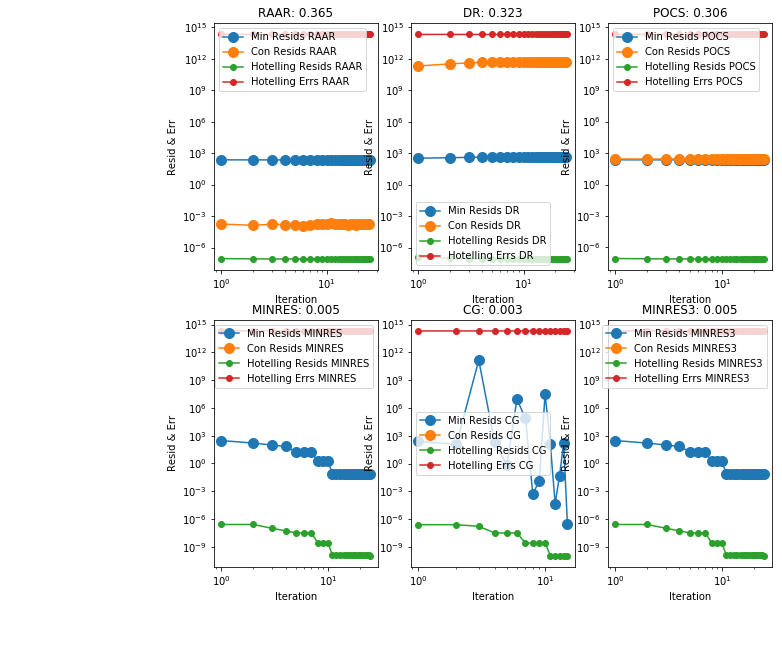

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077213667988e-07, 2.5636077213667988e-07, 2.5636077213667988e-07, 2.5636077213667988e-07]
[203858403169981.34, 203858403169981.34, 203858403169981.34, 203858403169981.34]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.311
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.302
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.27
===== method = all ======================================================================
          lam: 1.95E+10
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ============================

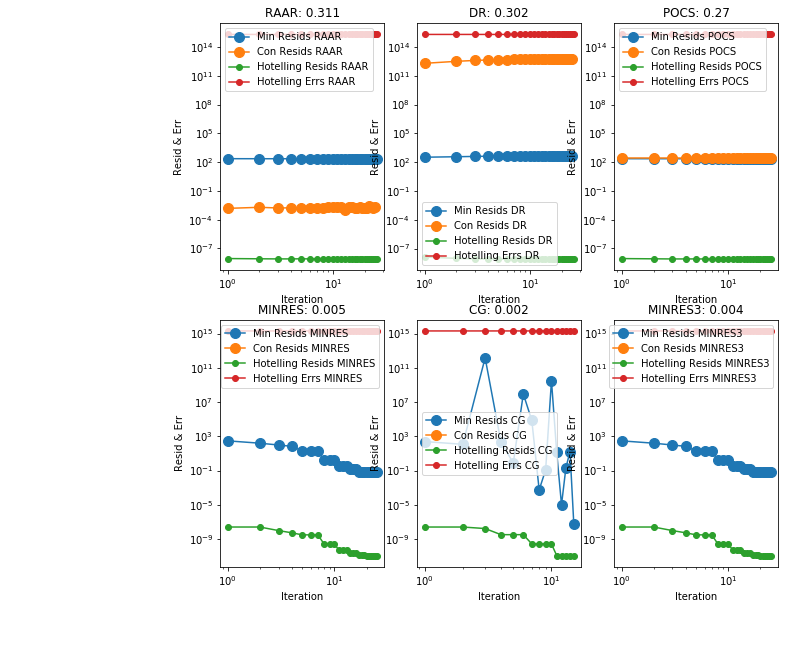

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077225470976e-08, 2.5636077225470976e-08, 2.5636077225470976e-08, 2.5636077225470976e-08]
[2038584031274968.2, 2038584031274968.2, 2038584031274968.2, 2038584031274968.2]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.32
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.372
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.275
===== method = all ======================================================================
          lam: 1.95E+11
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ============================

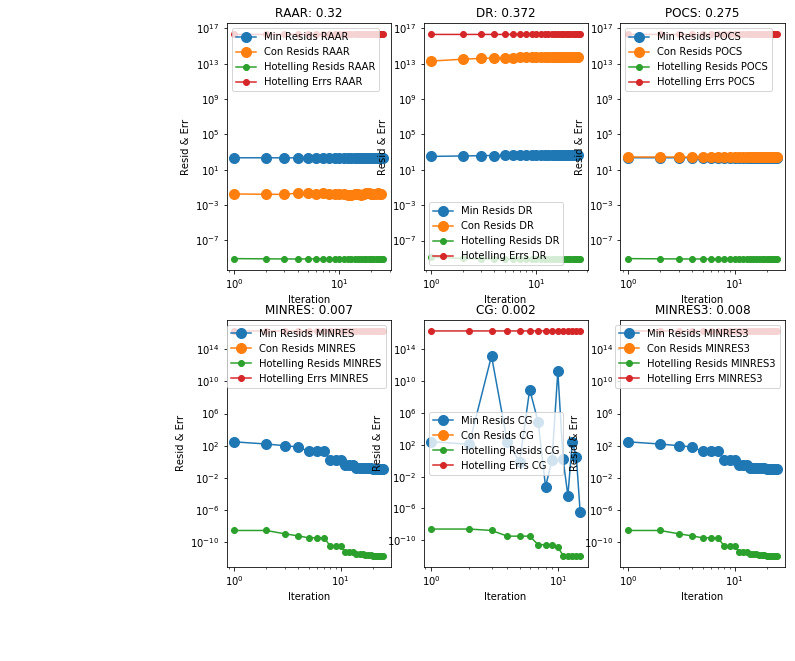

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077226651281e-09, 2.5636077226651281e-09, 2.5636077226651281e-09, 2.5636077226651281e-09]
[20385840306000392.0, 20385840306000392.0, 20385840306000392.0, 20385840306000392.0]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.481
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.512
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.475
===== method = all ======================================================================
          lam: 1.00E-02
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================

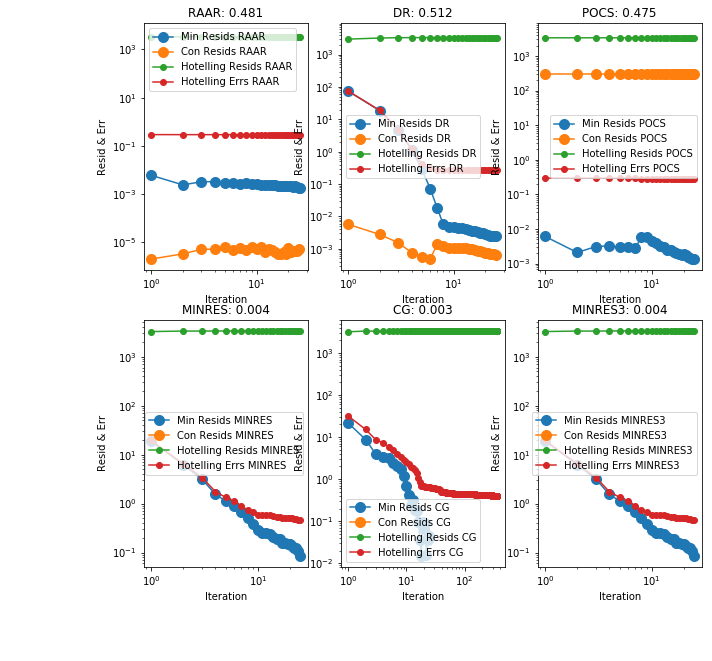

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[3088.5786901538331, 3088.5786901538331, 3088.5786901538331, 3088.5786901538331]
[299.79321156254667, 299.79321156254667, 299.79321156254667, 299.79321156254667]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.431
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.425
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.477
===== method = all ======================================================================
          lam: 1.95E+09
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================================

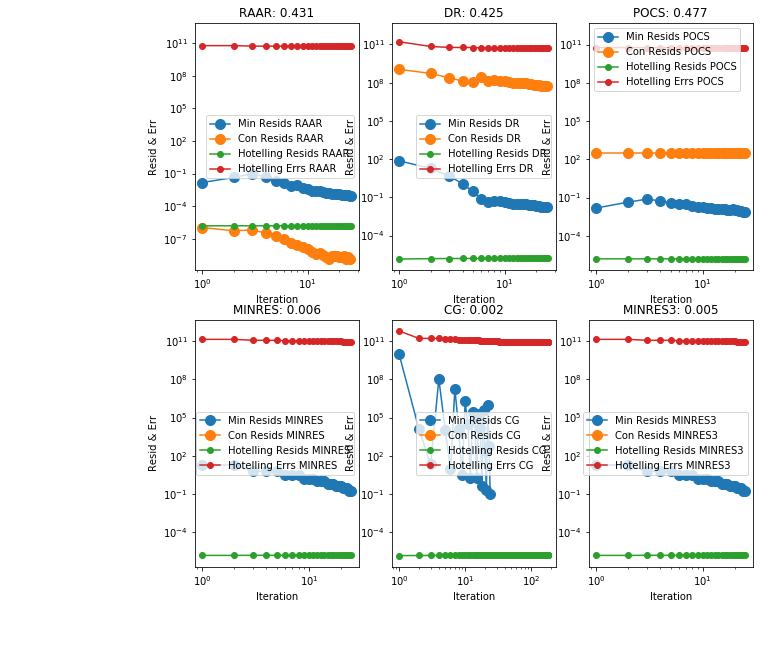

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196207467785e-06, 1.5213196207467785e-06, 1.5213196207467785e-06, 1.5213196207467785e-06]
[616746737911.7804, 616746737911.7804, 616746737911.7804, 616746737911.7804]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.328
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.333
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.301
===== method = all ======================================================================
          lam: 1.95E+10
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==============================

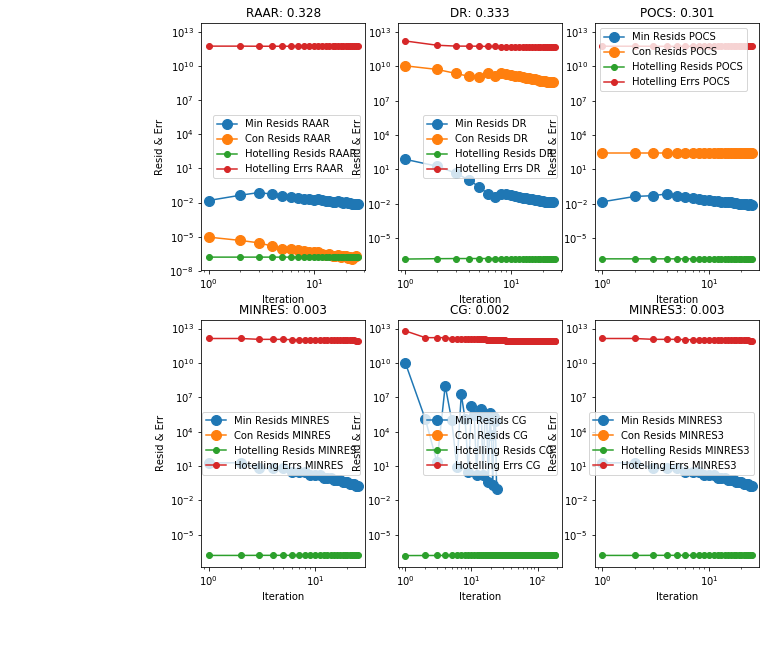

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214272971e-07, 1.5213196214272971e-07, 1.5213196214272971e-07, 1.5213196214272971e-07]
[6167467379430.8604, 6167467379430.8604, 6167467379430.8604, 6167467379430.8604]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.346
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.322
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.292
===== method = all ======================================================================
          lam: 1.95E+11
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================

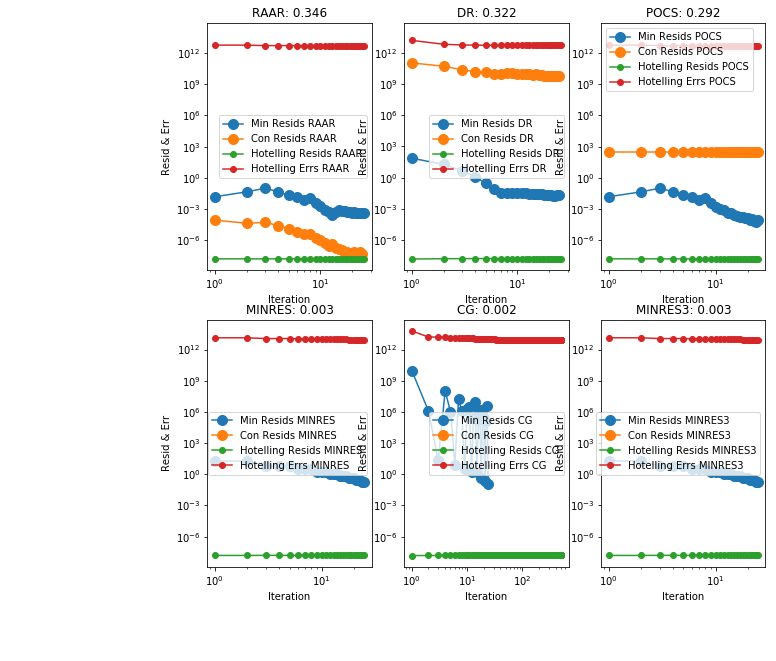

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214953515e-08, 1.5213196214953515e-08, 1.5213196214953515e-08, 1.5213196214953515e-08]
[61674673790278.398, 61674673790278.398, 61674673790278.398, 61674673790278.398]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.574
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.636
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.542
===== method = all ======================================================================
          lam: 1.00E-02
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================

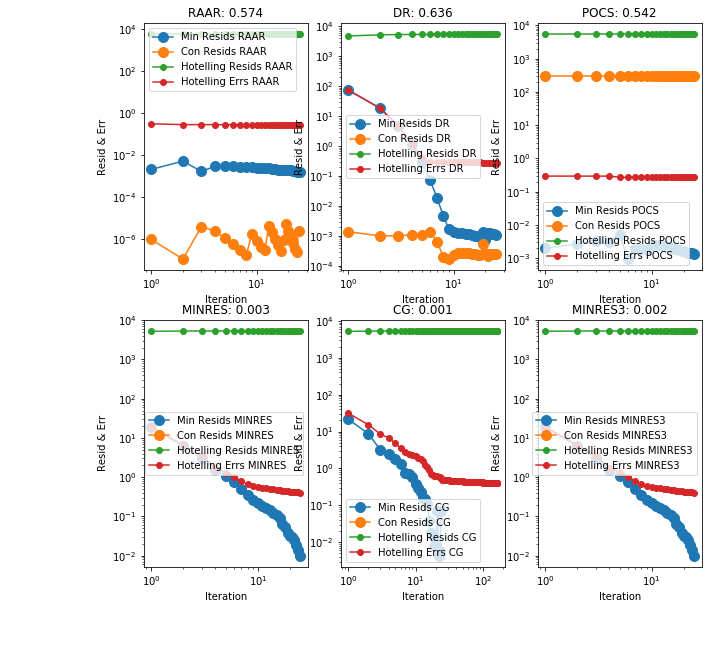

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[4257.3119277558289, 4257.3119277558289, 4257.3119277558289, 4257.3119277558289]
[299.79321156254719, 299.79321156254719, 299.79321156254719, 299.79321156254719]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.52
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.56
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.506
===== method = all ======================================================================
          lam: 1.95E+09
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ============================================

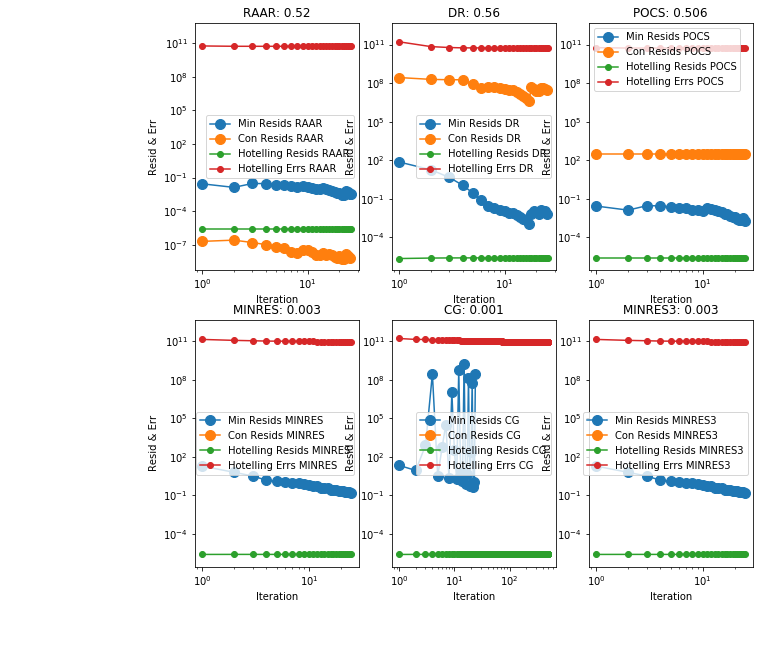

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943819885114e-06, 2.0969943819885114e-06, 2.0969943819885114e-06, 2.0969943819885114e-06]
[616746737492.59668, 616746737492.59668, 616746737492.59668, 616746737492.59668]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.718
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.749
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.662
===== method = all ======================================================================
          lam: 1.95E+10
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================

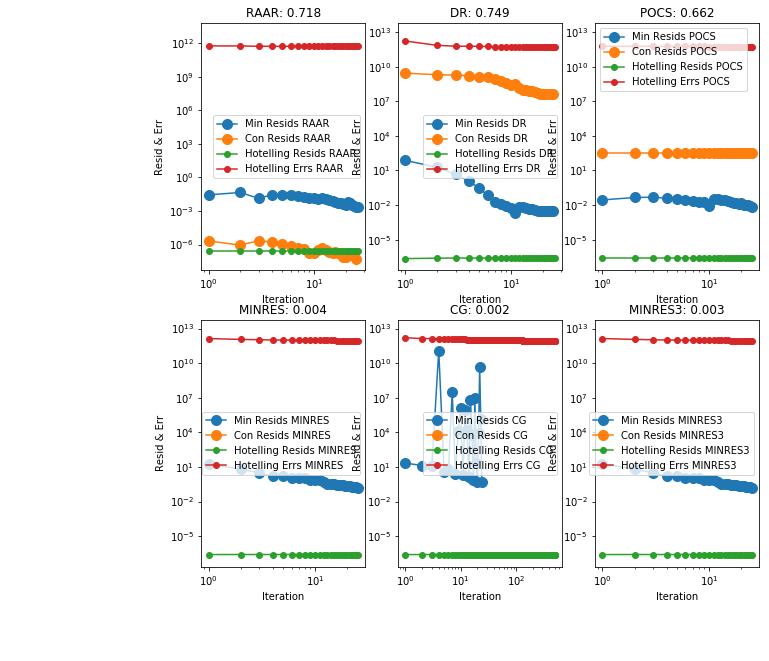

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943829265383e-07, 2.0969943829265383e-07, 2.0969943829265383e-07, 2.0969943829265383e-07]
[6167467379802.5322, 6167467379802.5322, 6167467379802.5322, 6167467379802.5322]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.778
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.726
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.706
===== method = all ======================================================================
          lam: 1.95E+11
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================

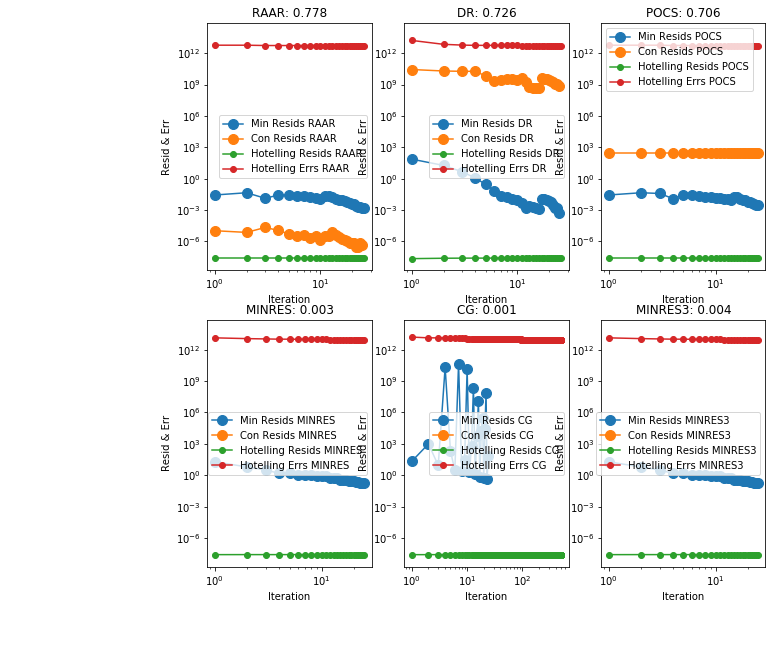

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943830203336e-08, 2.0969943830203336e-08, 2.0969943830203336e-08, 2.0969943830203336e-08]
[61674673846784.805, 61674673846784.805, 61674673846784.805, 61674673846784.805]



In [7]:
# solve problems together
m_rs = []
c_rs = []
h_rs = []
h_es = []
for p,idx in zip(ps,range(len(ps))):
    m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5, max_iter=25)
    m_rs.append([m_r[i][0] for i in range(4)])
    c_rs.append([c_r[i][0] for i in range(3)])
    h_rs.append([h_r[i][0] for i in range(4)])
    h_es.append([h_e[i][0] for i in range(4)])
    print(m_rs[idx])
    print(c_rs[idx])
    print(h_rs[idx])
    print(h_es[idx])
    print("")

-  __2D blur__
> - pixels = 1050
>> - dims: 21 $\times$ 50
> - ROI(k) = 5, 25, 45 with 3 steps (middle row 10)
> - $\lambda$ = 0.01, $\kappa$ $\times$ 0.01, $\kappa$, $\kappa$ $\times$ 10
> - B = identity

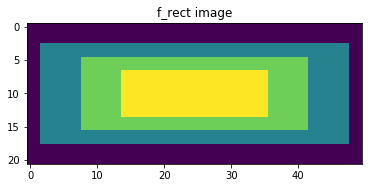

=================== setup ====================
(n_1, n_2, m) = (21, 50, 1050)
problem       = 2D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = 10

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (1050, 1050)
X shape       = (1050, 1050)
M shape       = (50, 1050)
B shape       = (1050, 1050)
sx shape      = (1050, 1)
sb shape      = (1050, 1)
============= system dimensions ===============
ESI_A shape   = (2100, 2100)
ESI_b shape   = (2100,)
ESIN_A shape  = (2100, 2100)
ESIN_b shape  = (2100,)


In [8]:
# single test
## problem
n_1 = 21
n_2 = 50
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, lam=lam, ESI=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 38.19
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 39.754
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 36.735
===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.05
===== method = all ======================================================================



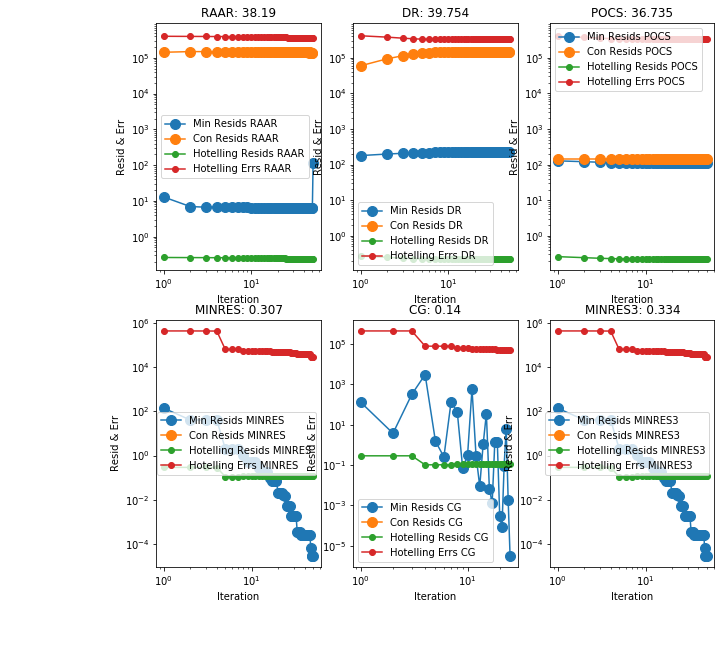

In [9]:
m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.05, sl_dr=1.5)

In [10]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 21
n_2    = 50
k      = 50
kk     = [5, 25, 45]

# find condition number of XtX
tp = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, ESI=False, ESIN=False, ESI3=False,dir_soln=False)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

# set regularization
lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

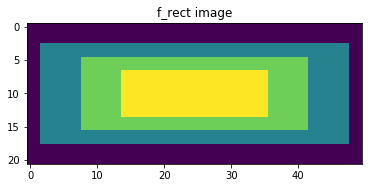

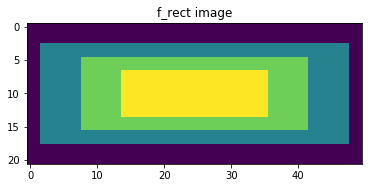

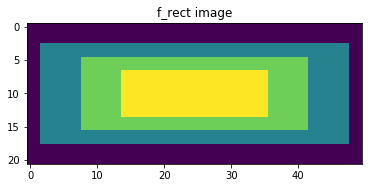

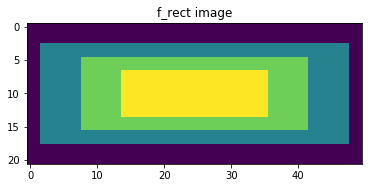

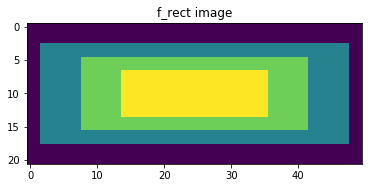

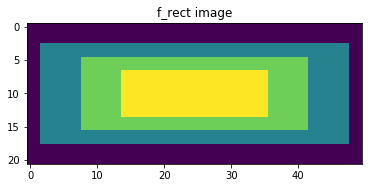

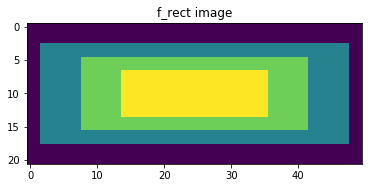

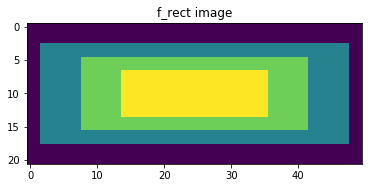

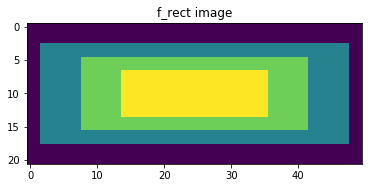

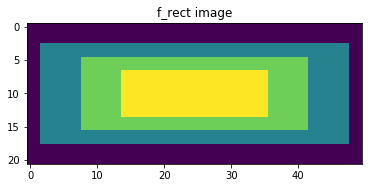

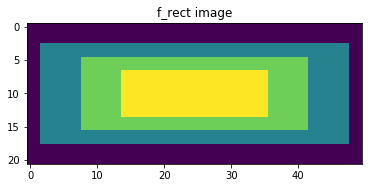

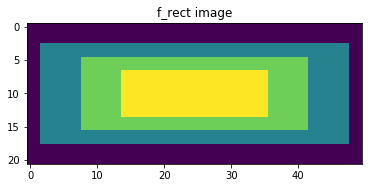

In [11]:
# create problems
ps2d = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, lam=lam, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps2d.append(p)

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 15.506
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 20.714
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 19.99
===== method = all ======================================================================
          lam: 1.00E-02
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



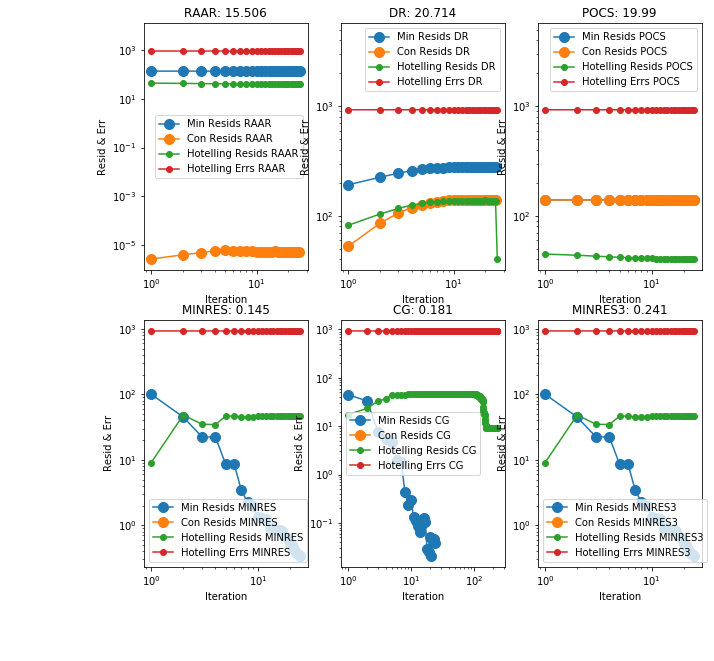

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[46.231085258529845, 46.231085258529845, 46.231085258529845, 46.231085258529845]
[929.33363517305759, 929.33363517305759, 929.33363517305759, 929.33363517305759]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.972
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 15.747
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 15.153
===== method = all ======================================================================
          lam: 9.67E+17
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================================

/Users/jakeroth/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


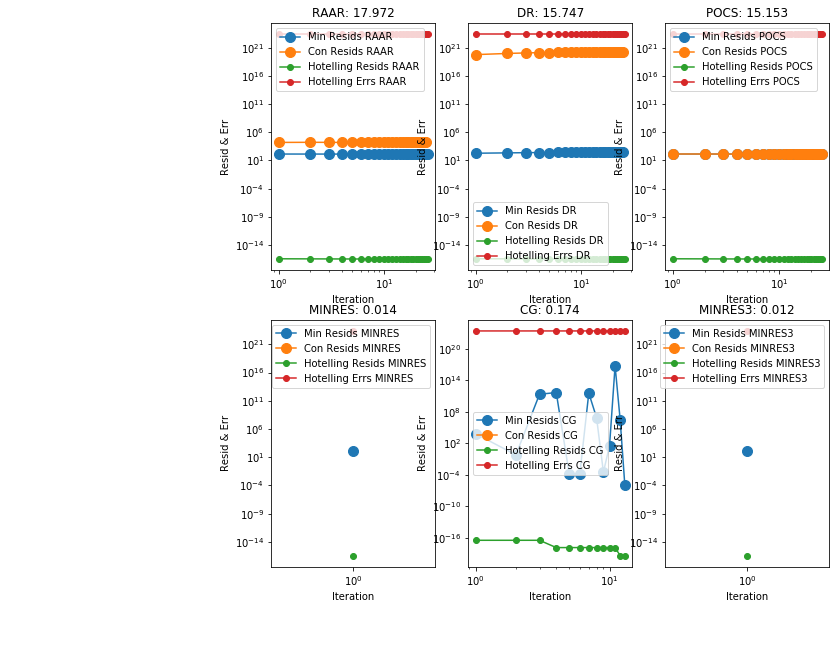

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.7635933783887152e-17, 3.7635933783887152e-17, 3.7635933783887152e-17, 3.7635933783887152e-17]
[2.2955216923882391e+23, 2.2955216923882391e+23, 2.2955216923882391e+23, 2.2955216923882391e+23]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 19.683
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 16.688
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 20.152
===== method = all ======================================================================
          lam: 9.67E+18
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========

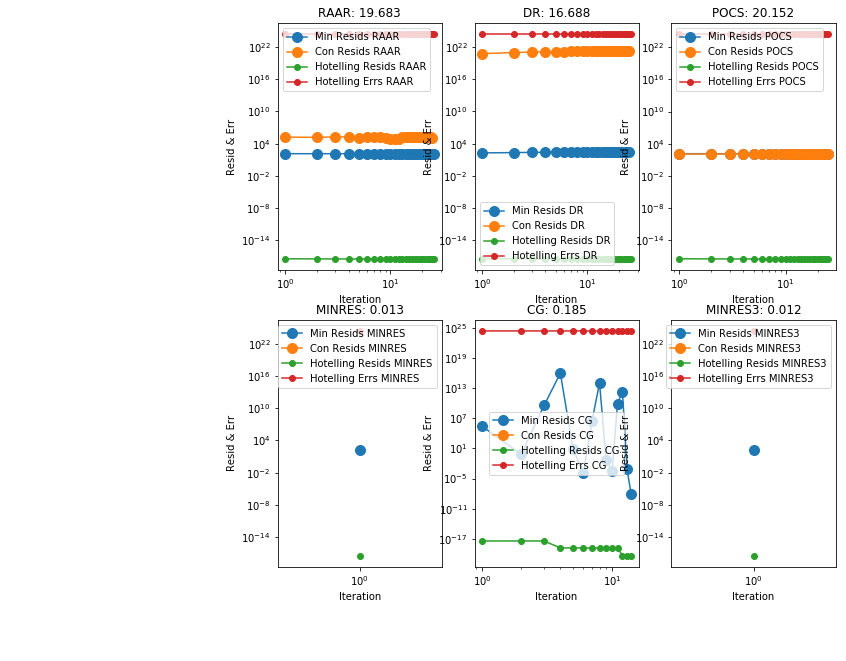

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.7635933783887166e-18, 3.7635933783887166e-18, 3.7635933783887166e-18, 3.7635933783887166e-18]
[2.2955216894169916e+24, 2.2955216894169916e+24, 2.2955216894169916e+24, 2.2955216894169916e+24]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 15.137
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 15.29
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 18.495
===== method = all ======================================================================
          lam: 9.67E+19
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ============

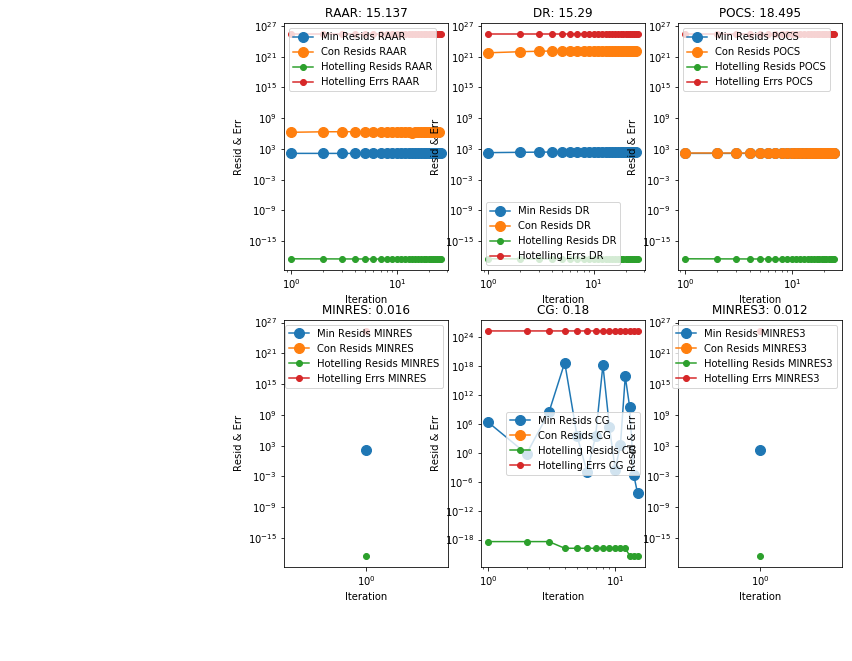

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.7635933783887157e-19, 3.7635933783887157e-19, 3.7635933783887157e-19, 3.7635933783887157e-19]
[2.2955216908922052e+25, 2.2955216908922052e+25, 2.2955216908922052e+25, 2.2955216908922052e+25]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 18.075
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 24.258
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 17.533
===== method = all ======================================================================
          lam: 1.00E-02
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========

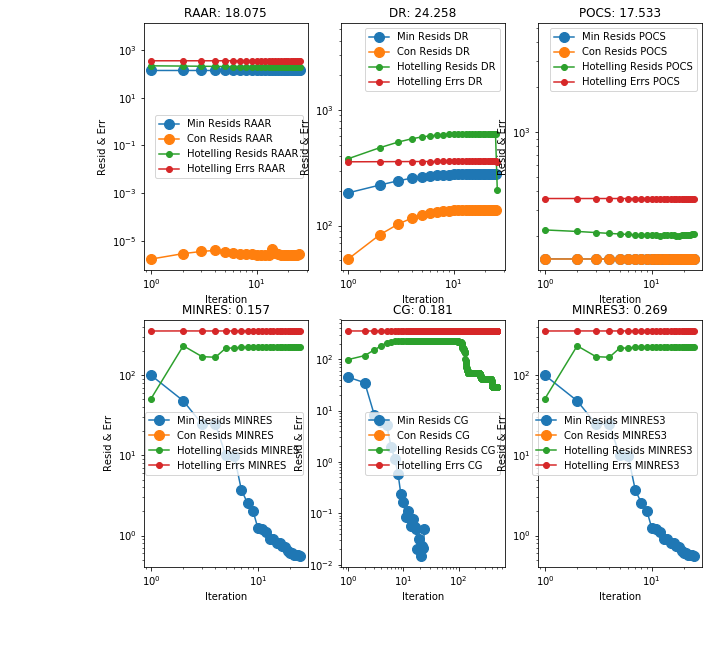

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[225.52262265488156, 225.52262265488156, 225.52262265488156, 225.52262265488156]
[355.94620527568719, 355.94620527568719, 355.94620527568719, 355.94620527568719]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.436
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 20.513
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 17.38
===== method = all ======================================================================
          lam: 9.67E+17
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================================

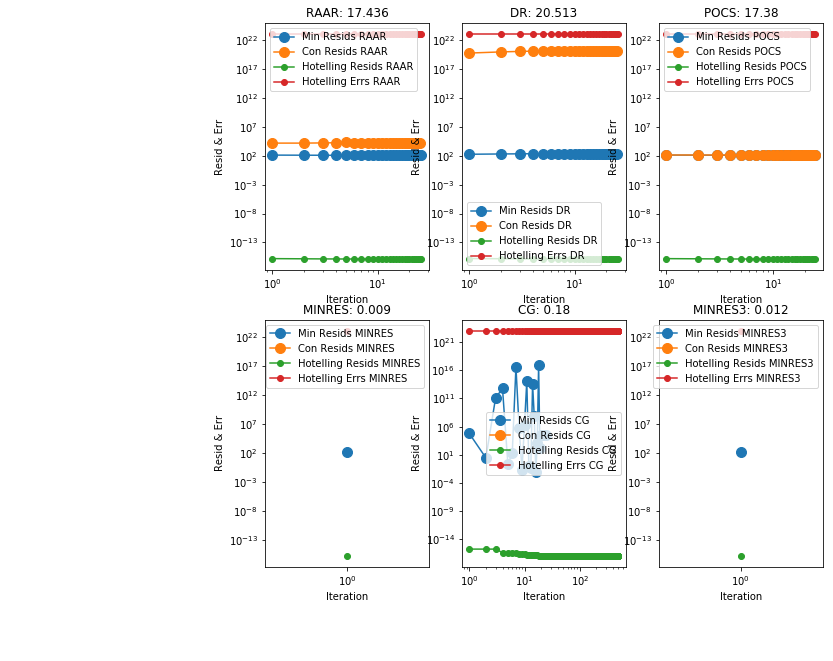

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.8091136442572456e-16, 1.8091136442572456e-16, 1.8091136442572456e-16, 1.8091136442572456e-16]
[9.7333911342865678e+22, 9.7333911342865678e+22, 9.7333911342865678e+22, 9.7333911342865678e+22]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 20.238
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 17.272
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 18.0
===== method = all ======================================================================
          lam: 9.67E+18
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ============

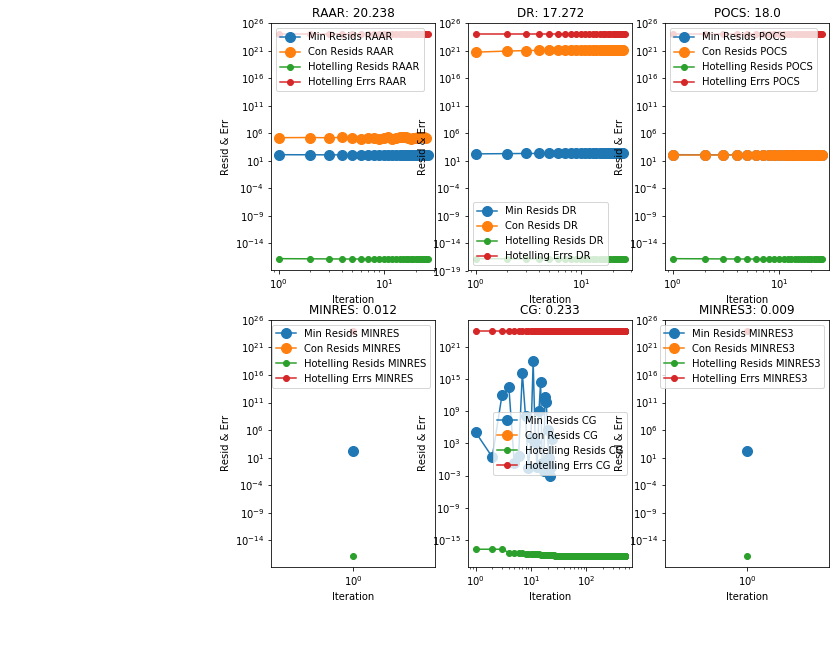

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.8091136442572451e-17, 1.8091136442572451e-17, 1.8091136442572451e-17, 1.8091136442572451e-17]
[9.7333911052177912e+23, 9.7333911052177912e+23, 9.7333911052177912e+23, 9.7333911052177912e+23]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 15.148
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 19.74
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 19.512
===== method = all ======================================================================
          lam: 9.67E+19
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========

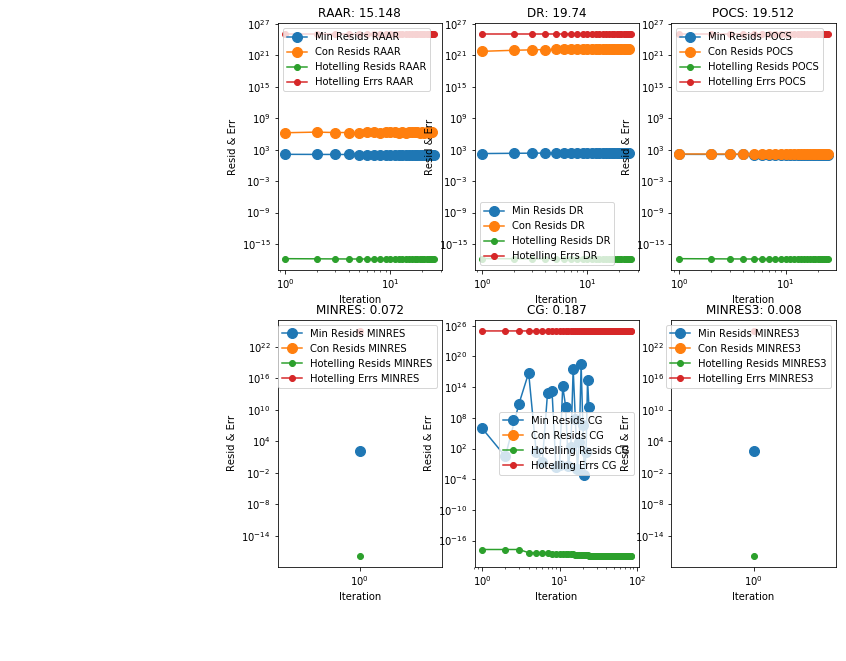

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.809113644257246e-18, 1.809113644257246e-18, 1.809113644257246e-18, 1.809113644257246e-18]
[9.7333911232134967e+24, 9.7333911232134967e+24, 9.7333911232134967e+24, 9.7333911232134967e+24]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.602
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 20.941
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 20.516
===== method = all ======================================================================
          lam: 1.00E-02
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==============

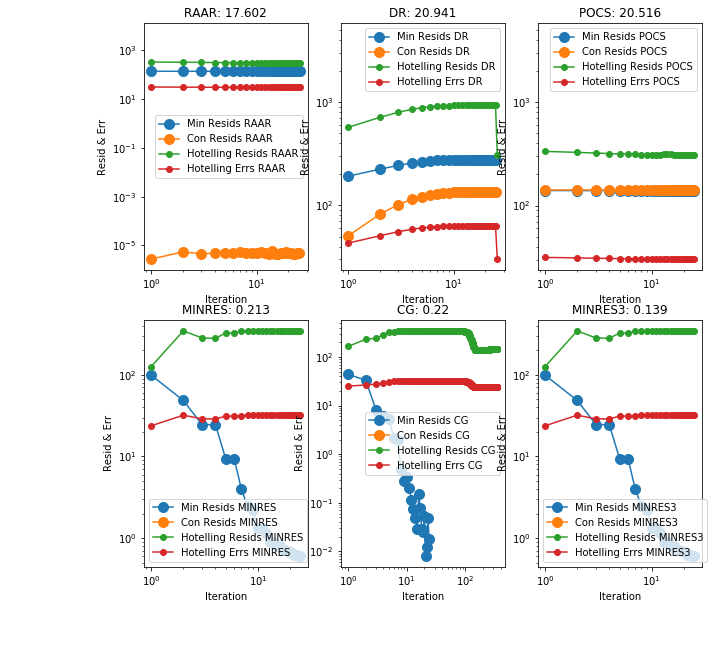

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[343.6150801626398, 343.6150801626398, 343.6150801626398, 343.6150801626398]
[31.86741074668678, 31.86741074668678, 31.86741074668678, 31.86741074668678]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 19.654
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 19.755
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 19.008
===== method = all ======================================================================
          lam: 9.67E+17
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==================================================

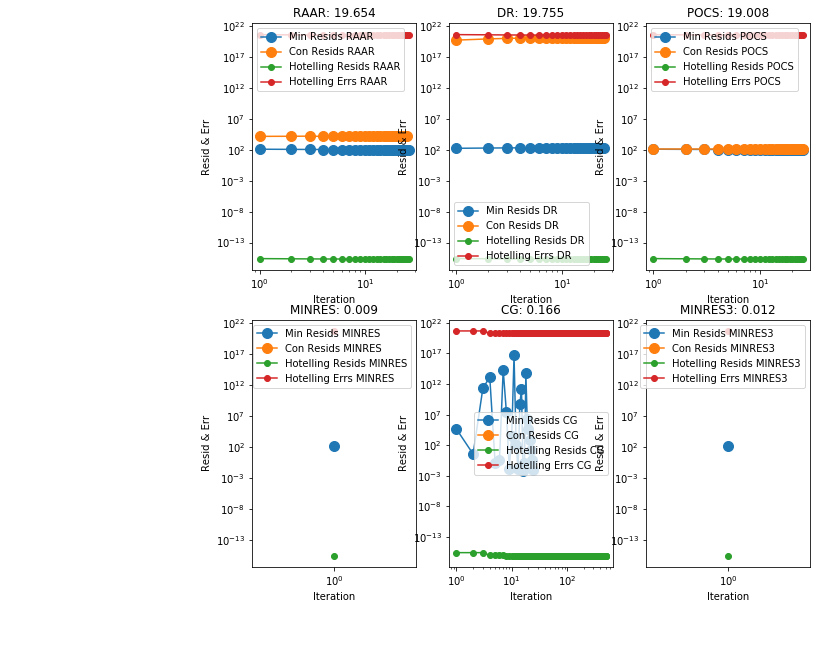

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[2.8215304024103774e-16, 2.8215304024103774e-16, 2.8215304024103774e-16, 2.8215304024103774e-16]
[4.7845322504291195e+20, 4.7845322504291195e+20, 4.7845322504291195e+20, 4.7845322504291195e+20]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 19.488
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 16.933
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 20.223
===== method = all ======================================================================
          lam: 9.67E+18
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========

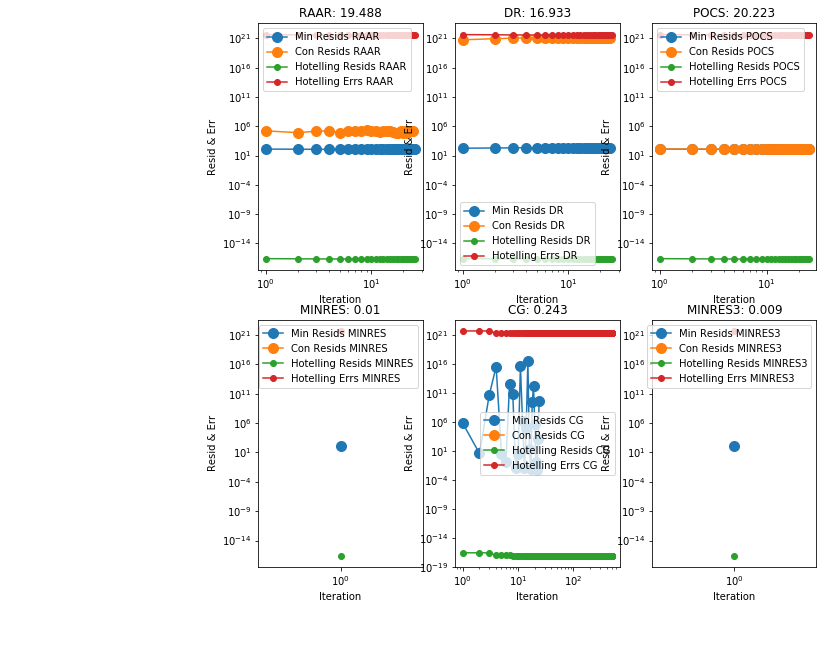

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[2.821530402410378e-17, 2.821530402410378e-17, 2.821530402410378e-17, 2.821530402410378e-17]
[4.7845322187743177e+21, 4.7845322187743177e+21, 4.7845322187743177e+21, 4.7845322187743177e+21]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 21.673
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 19.524
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 18.582
===== method = all ======================================================================
          lam: 9.67E+19
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==============

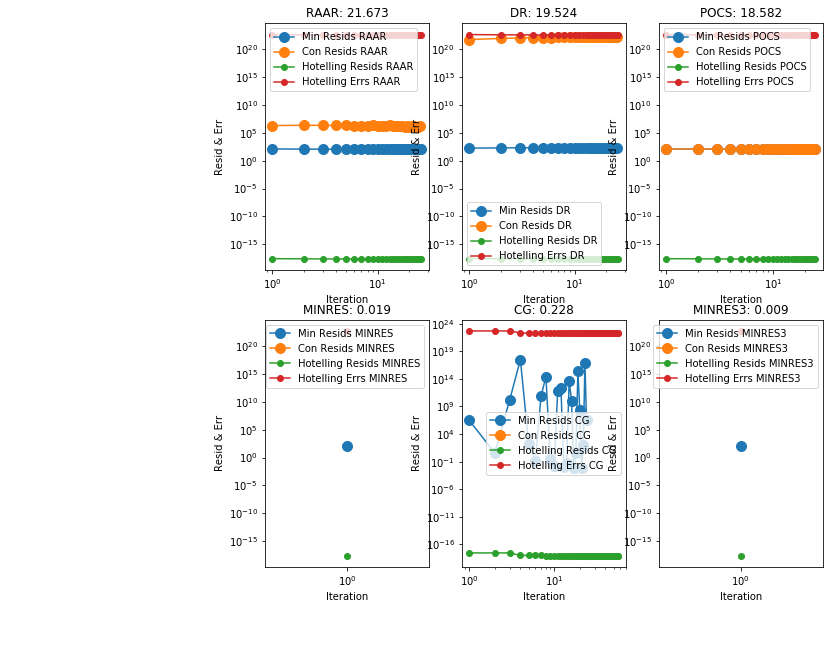

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[2.8215304024103823e-18, 2.8215304024103823e-18, 2.8215304024103823e-18, 2.8215304024103823e-18]
[4.7845322087031621e+22, 4.7845322087031621e+22, 4.7845322087031621e+22, 4.7845322087031621e+22]



In [12]:
# solve problems together
m_rs = []
c_rs = []
h_rs = []
h_es = []
for p,idx in zip(ps2d,range(len(ps2d))):
    m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5, max_iter=25)
    m_rs.append([m_r[i][0] for i in range(4)])
    c_rs.append([c_r[i][0] for i in range(3)])
    h_rs.append([h_r[i][0] for i in range(4)])
    h_es.append([h_e[i][0] for i in range(4)])
    print(m_rs[idx])
    print(c_rs[idx])
    print(h_rs[idx])
    print(h_es[idx])
    print("")